# Missing data visualizations will help you understand:

- Where missing data occurs

- How much data is missing

- Patterns in missing data

- Relationships between missing values

- Impact on different groups

- Best strategies for handling missing data

## Method 1: Basic Missing Data Heatmap

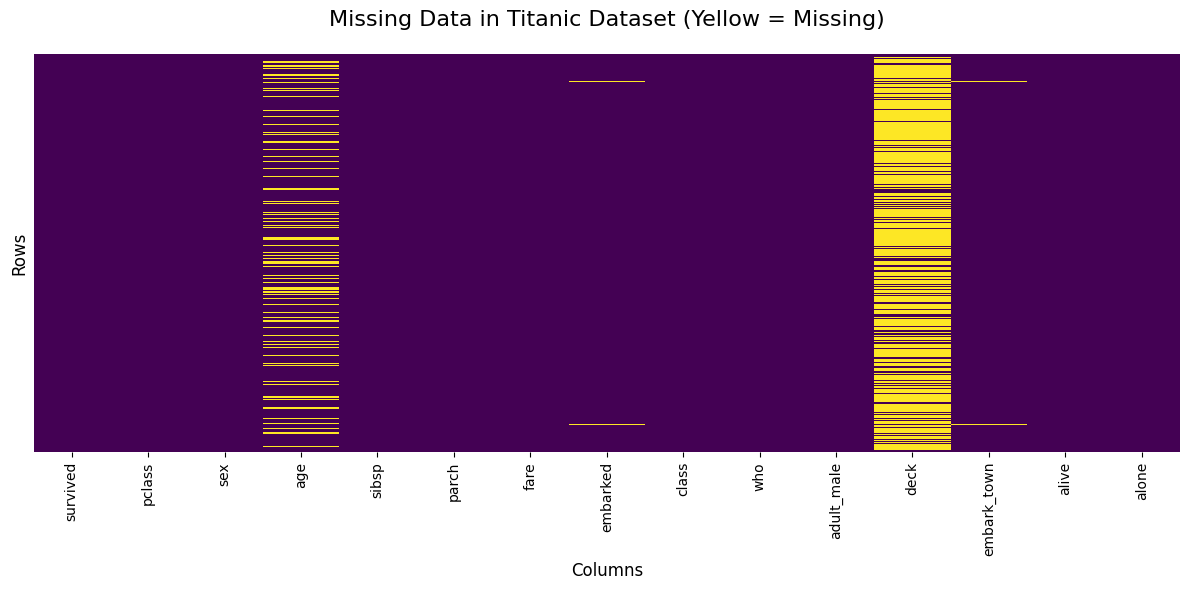

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Basic missing data heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(titanic.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')
plt.title('Missing Data in Titanic Dataset (Yellow = Missing)', fontsize=16, pad=20)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.tight_layout()
plt.show()

## Method 2: Advanced Missing Data Visualization with Statistics

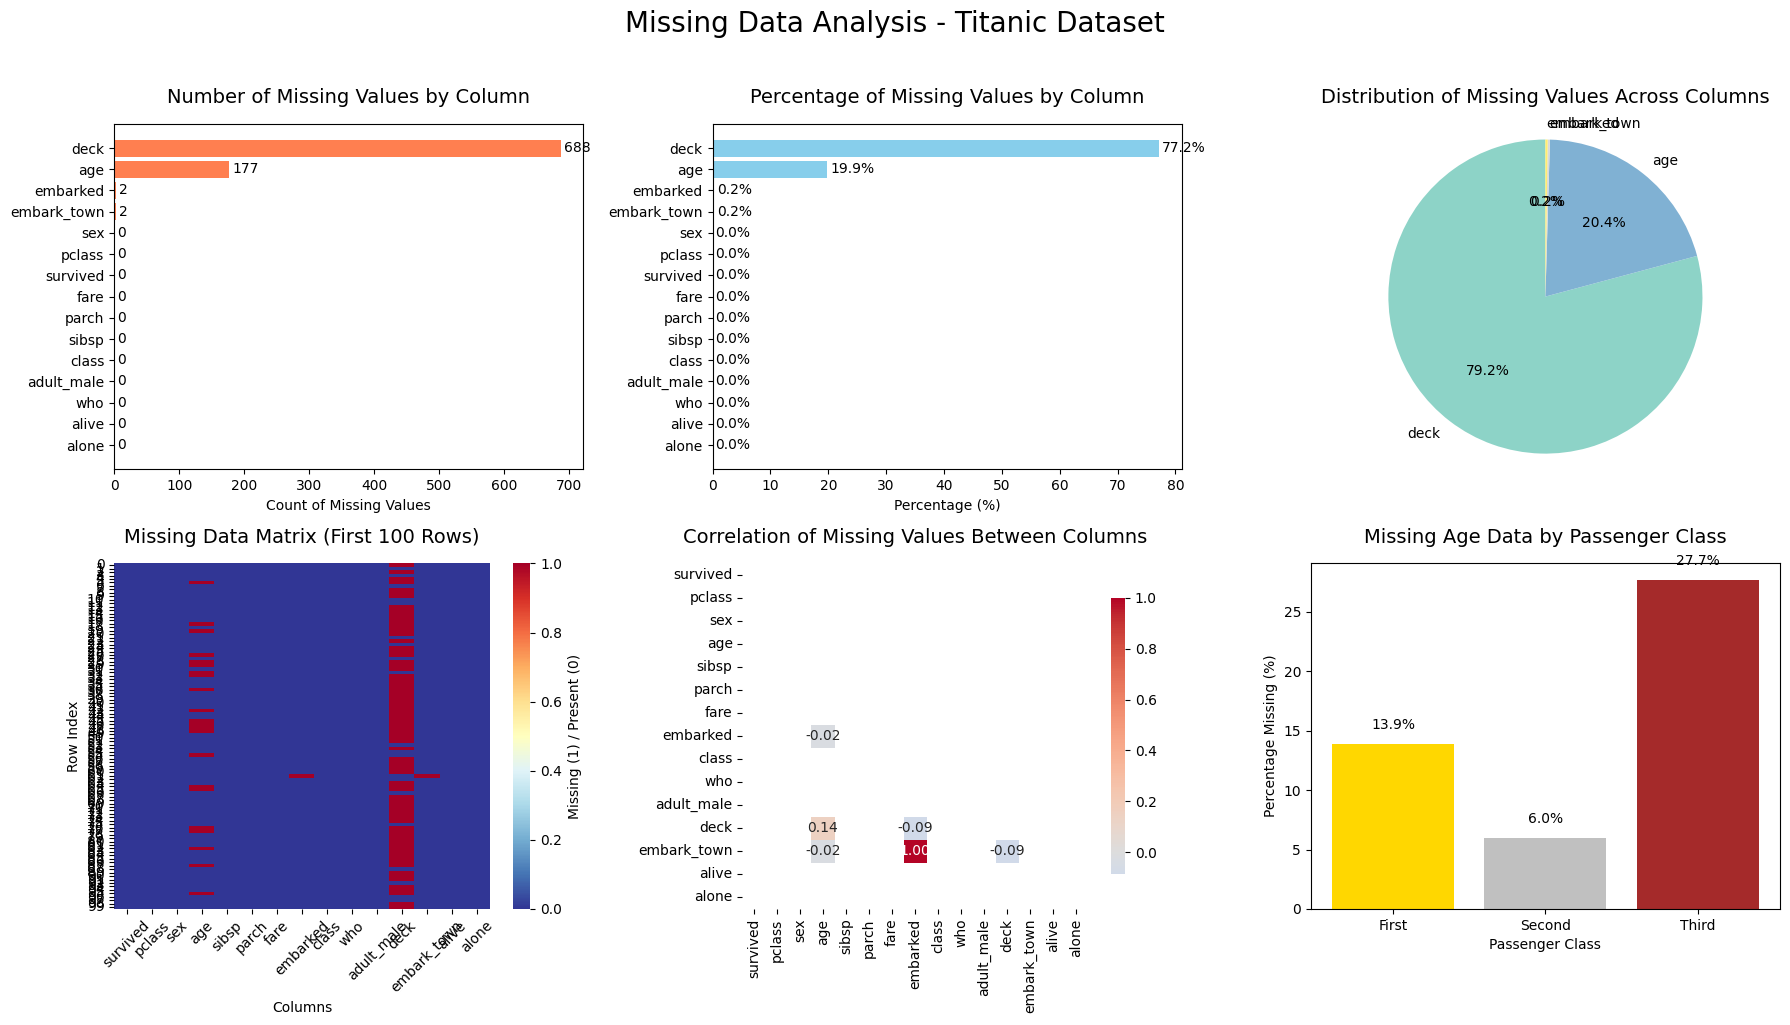

MISSING DATA SUMMARY
Total rows in dataset: 891
Total columns: 15
Total missing values: 869
Overall missing percentage: 6.50%

Columns with missing values:
  deck           :  688 missing ( 77.2%)
  age            :  177 missing ( 19.9%)
  embarked       :    2 missing (  0.2%)
  embark_town    :    2 missing (  0.2%)


In [2]:
# Calculate missing data statistics
missing_counts = titanic.isnull().sum()
missing_percentage = (missing_counts / len(titanic)) * 100
missing_df = pd.DataFrame({
    'column': titanic.columns,
    'missing_count': missing_counts.values,
    'missing_percentage': missing_percentage.values
}).sort_values('missing_percentage', ascending=False)

# Create subplots for comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Missing Data Analysis - Titanic Dataset', fontsize=20, y=1.02)

# 1. Bar chart of missing values count
bars = axes[0, 0].barh(missing_df['column'], missing_df['missing_count'], color='coral')
axes[0, 0].set_title('Number of Missing Values by Column', fontsize=14, pad=15)
axes[0, 0].set_xlabel('Count of Missing Values')
axes[0, 0].invert_yaxis()  # Highest on top
# Add count labels
for bar in bars:
    width = bar.get_width()
    axes[0, 0].text(width + 5, bar.get_y() + bar.get_height()/2, 
                   f'{int(width)}', ha='left', va='center')

# 2. Percentage bar chart
bars2 = axes[0, 1].barh(missing_df['column'], missing_df['missing_percentage'], color='skyblue')
axes[0, 1].set_title('Percentage of Missing Values by Column', fontsize=14, pad=15)
axes[0, 1].set_xlabel('Percentage (%)')
axes[0, 1].invert_yaxis()
# Add percentage labels
for bar in bars2:
    width = bar.get_width()
    axes[0, 1].text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                   f'{width:.1f}%', ha='left', va='center')

# 3. Pie chart for columns with missing values (only those with missing data)
missing_columns = missing_df[missing_df['missing_count'] > 0]
if not missing_columns.empty:
    axes[0, 2].pie(missing_columns['missing_count'], 
                  labels=missing_columns['column'],
                  autopct='%1.1f%%',
                  startangle=90,
                  colors=plt.cm.Set3(np.linspace(0, 1, len(missing_columns))))
    axes[0, 2].set_title('Distribution of Missing Values Across Columns', fontsize=14, pad=15)
    axes[0, 2].axis('equal')
else:
    axes[0, 2].text(0.5, 0.5, 'No Missing Data!', 
                   ha='center', va='center', fontsize=16)
    axes[0, 2].set_title('No Missing Values Found', fontsize=14, pad=15)

# 4. Matrix visualization (zoomed for better view)
# Show only first 100 rows for clarity
plt.sca(axes[1, 0])
sns.heatmap(titanic.head(100).isnull(), 
            yticklabels=True,
            cbar=True,
            cmap='RdYlBu_r',
            cbar_kws={'label': 'Missing (1) / Present (0)'})
axes[1, 0].set_title('Missing Data Matrix (First 100 Rows)', fontsize=14, pad=15)
axes[1, 0].set_xlabel('Columns')
axes[1, 0].set_ylabel('Row Index')
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Missing data correlation heatmap
# Create correlation matrix of missing values (which columns are missing together?)
missing_corr = titanic.isnull().corr()
mask = np.triu(np.ones_like(missing_corr, dtype=bool))
sns.heatmap(missing_corr, 
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={'shrink': 0.8},
            ax=axes[1, 1])
axes[1, 1].set_title('Correlation of Missing Values Between Columns', fontsize=14, pad=15)

# 6. Missing data pattern by passenger class
# Create a pivot of missing age by passenger class
if 'pclass' in titanic.columns and 'age' in titanic.columns:
    age_missing_by_class = titanic.groupby('pclass')['age'].apply(lambda x: x.isnull().mean() * 100)
    class_labels = {1: 'First', 2: 'Second', 3: 'Third'}
    x_labels = [class_labels.get(c, f'Class {c}') for c in age_missing_by_class.index]
    
    bars3 = axes[1, 2].bar(x_labels, age_missing_by_class.values, color=['gold', 'silver', 'brown'])
    axes[1, 2].set_title('Missing Age Data by Passenger Class', fontsize=14, pad=15)
    axes[1, 2].set_ylabel('Percentage Missing (%)')
    axes[1, 2].set_xlabel('Passenger Class')
    
    # Add percentage labels on bars
    for bar in bars3:
        height = bar.get_height()
        axes[1, 2].text(bar.get_x() + bar.get_width()/2, height + 1,
                       f'{height:.1f}%', ha='center', va='bottom')
else:
    axes[1, 2].text(0.5, 0.5, 'Age or Pclass column not found', 
                   ha='center', va='center', fontsize=12)
    axes[1, 2].set_title('Cannot Analyze by Class', fontsize=14, pad=15)

plt.tight_layout()
plt.show()

# Print summary statistics
print("=" * 70)
print("MISSING DATA SUMMARY")
print("=" * 70)
print(f"Total rows in dataset: {len(titanic)}")
print(f"Total columns: {len(titanic.columns)}")
print(f"Total missing values: {titanic.isnull().sum().sum()}")
print(f"Overall missing percentage: {(titanic.isnull().sum().sum() / (len(titanic) * len(titanic.columns)) * 100):.2f}%")
print("\nColumns with missing values:")
for idx, row in missing_df[missing_df['missing_count'] > 0].iterrows():
    print(f"  {row['column']:15s}: {row['missing_count']:4d} missing ({row['missing_percentage']:5.1f}%)")
print("=" * 70)

In [3]:
pip install plotly

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ----------------------- ---------------- 5.8/9.9 MB 31.3 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 27.3 MB/s  0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Method 3: Interactive Missing Data Visualization (if you have plotly)

In [7]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Calculate missing data statistics
missing_counts = titanic.isnull().sum()
missing_percentage = (missing_counts / len(titanic)) * 100
missing_df = pd.DataFrame({
    'column': titanic.columns,
    'missing_count': missing_counts.values,
    'missing_percentage': missing_percentage.values
}).sort_values('missing_percentage', ascending=False)

# Create interactive bar chart - CORRECTED VERSION
fig = go.Figure()

fig.add_trace(go.Bar(
    x=missing_df['missing_percentage'],
    y=missing_df['column'],
    orientation='h',
    marker=dict(
        color=missing_df['missing_percentage'],
        colorscale='Reds',
        showscale=True,
        colorbar=dict(title="Missing %")
    ),
    text=[f'{p:.1f}%' for p in missing_df['missing_percentage']],
    textposition='auto',
    name='Missing Percentage'
))

fig.update_layout(
    title='Missing Data Percentage by Column - Titanic Dataset',
    xaxis_title='Percentage Missing (%)',
    yaxis_title='Columns',
    yaxis={'categoryorder': 'total ascending'},
    height=600,
    width=800,
    showlegend=False
)

# Try to show the figure
try:
    fig.show()
except Exception as e:
    print(f"Could not display interactive plot. Error: {e}")
    print("\nSaving plot as HTML file instead...")
    fig.write_html("missing_data_plot.html")
    print("Plot saved as 'missing_data_plot.html'. Open this file in your browser.")

Could not display interactive plot. Error: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Saving plot as HTML file instead...
Plot saved as 'missing_data_plot.html'. Open this file in your browser.


## Method 4: Missing Data Patterns and Dendrogram

In [8]:
pip install missingno

  Using cached scipy-1.17.0-cp314-cp314-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.17.0-cp314-cp314-win_amd64.whl (37.1 MB)

   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   ---------------------------------------- 0/2 [scipy]
   -----------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\touhi\AppData\Local\Temp\ipykernel_1544\1658514587.py:9: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



<Figure size 1200x600 with 0 Axes>

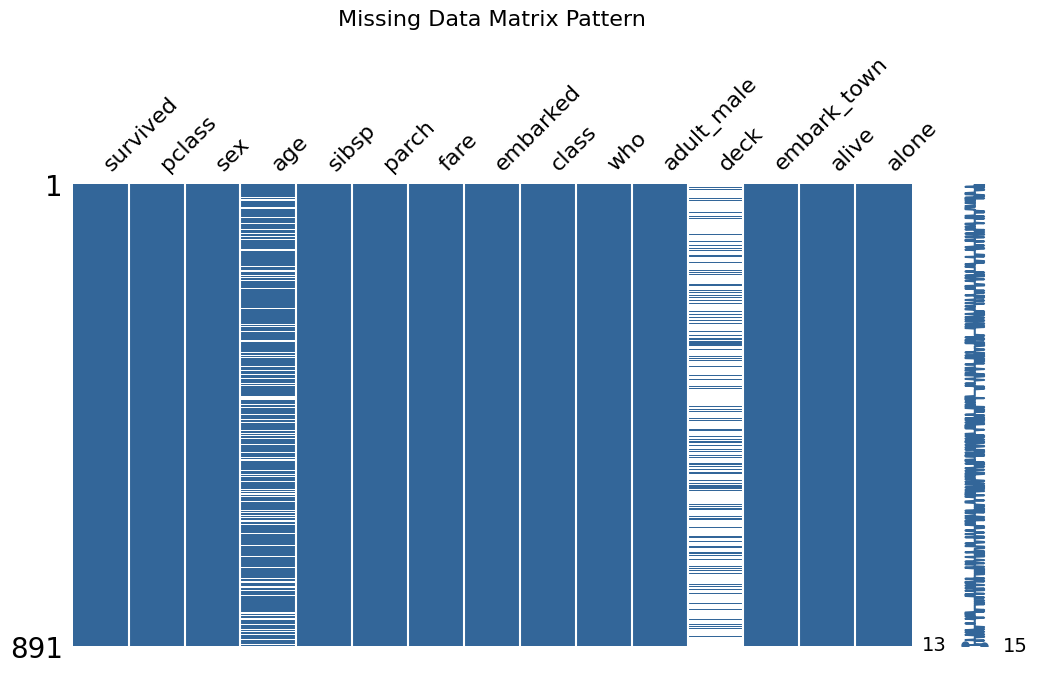

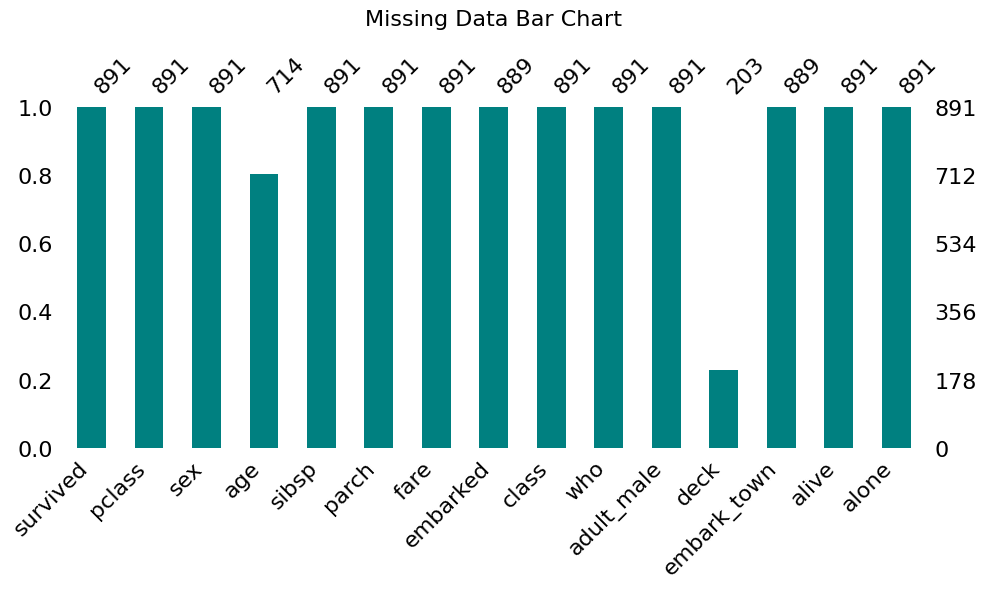

<Figure size 1000x800 with 0 Axes>

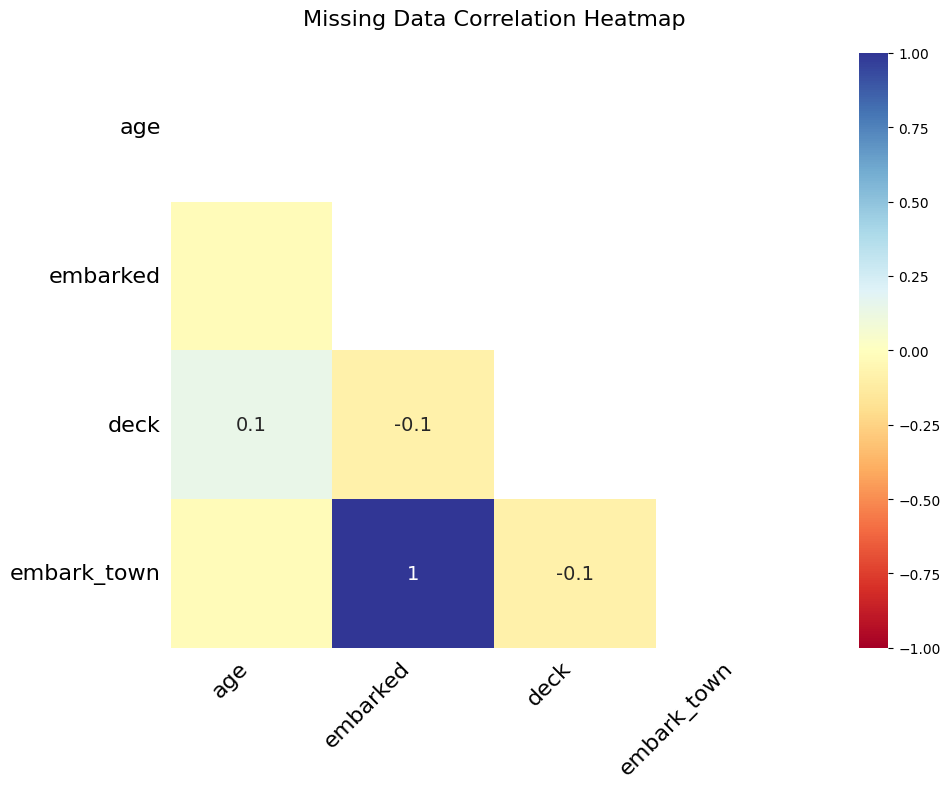

<Figure size 1200x600 with 0 Axes>

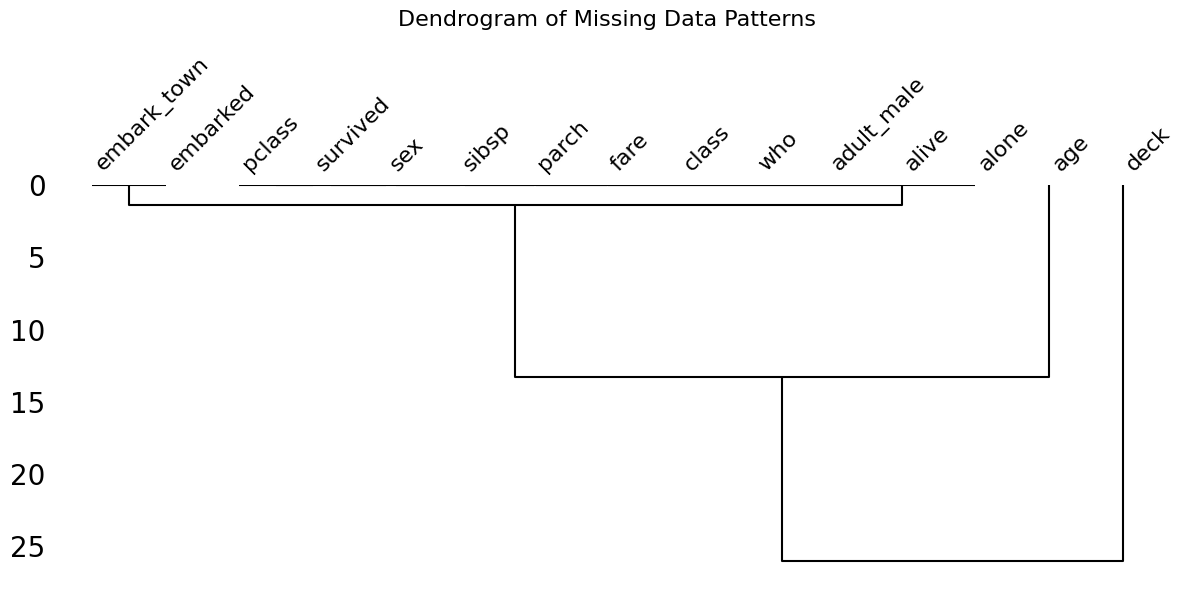

In [9]:
import missingno as msno

# Check if missingno is installed, if not suggest installation
try:
    # Matrix plot
    plt.figure(figsize=(12, 6))
    msno.matrix(titanic, figsize=(12, 6), color=(0.2, 0.4, 0.6))
    plt.title('Missing Data Matrix Pattern', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Bar plot
    plt.figure(figsize=(10, 6))
    msno.bar(titanic, figsize=(10, 6), color='teal')
    plt.title('Missing Data Bar Chart', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Heatmap of missing data correlation
    plt.figure(figsize=(10, 8))
    msno.heatmap(titanic, figsize=(10, 8), cmap='RdYlBu')
    plt.title('Missing Data Correlation Heatmap', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Dendrogram showing clustering of missing data patterns
    plt.figure(figsize=(12, 6))
    msno.dendrogram(titanic, figsize=(12, 6))
    plt.title('Dendrogram of Missing Data Patterns', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("missingno library not installed.")
    print("Install with: pip install missingno")
    
    # Alternative visualization
    print("\nCreating alternative visualizations with matplotlib...")
    
    # Custom matrix plot
    plt.figure(figsize=(12, 6))
    missing_matrix = titanic.isnull().astype(int)
    
    plt.imshow(missing_matrix.T, aspect='auto', cmap='binary', interpolation='none')
    plt.colorbar(label='Missing (1) / Present (0)')
    plt.title('Missing Data Matrix (Custom)', fontsize=16, pad=20)
    plt.xlabel('Row Index')
    plt.ylabel('Columns')
    plt.yticks(range(len(titanic.columns)), titanic.columns)
    plt.tight_layout()
    plt.show()

## Method 5: Statistical Summary of Missing Data

In [10]:
# Create a comprehensive statistical summary
print("=" * 80)
print("COMPREHENSIVE MISSING DATA ANALYSIS - TITANIC DATASET")
print("=" * 80)

# Create summary dataframe
summary_data = []
for column in titanic.columns:
    missing_count = titanic[column].isnull().sum()
    missing_percent = (missing_count / len(titanic)) * 100
    data_type = titanic[column].dtype
    unique_count = titanic[column].nunique()
    
    summary_data.append({
        'Column': column,
        'Data Type': data_type,
        'Total Values': len(titanic),
        'Non-Null': len(titanic) - missing_count,
        'Missing': missing_count,
        'Missing %': f"{missing_percent:.2f}%",
        'Unique Values': unique_count,
        'Fill Strategy': 'Keep' if missing_percent < 5 else 
                        'Impute' if missing_percent < 30 else 
                        'Consider Dropping'
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string())

print("\n" + "=" * 80)
print("RECOMMENDED ACTIONS BASED ON MISSING DATA:")
print("=" * 80)

# Provide recommendations
for idx, row in summary_df.iterrows():
    if row['Missing'] > 0:
        missing_pct = float(row['Missing %'].rstrip('%'))
        
        if missing_pct < 5:
            print(f"✓ {row['Column']}: {missing_pct:.1f}% missing - Can be imputed with mean/median/mode")
        elif 5 <= missing_pct < 20:
            print(f"⚠ {row['Column']}: {missing_pct:.1f}% missing - Consider advanced imputation methods")
        elif 20 <= missing_pct < 50:
            print(f"⚠ {row['Column']}: {missing_pct:.1f}% missing - May need domain-specific handling")
        else:
            print(f"✗ {row['Column']}: {missing_pct:.1f}% missing - Consider dropping column or using as flag")

# Special analysis for specific columns
print("\n" + "=" * 80)
print("SPECIFIC COLUMN ANALYSIS:")
print("=" * 80)

if 'age' in titanic.columns:
    age_missing = titanic['age'].isnull().sum()
    print(f"\nAge Column:")
    print(f"  • Missing: {age_missing} values ({age_missing/len(titanic)*100:.1f}%)")
    print(f"  • Impact: Age is important for survival analysis")
    print(f"  • Recommendation: Impute with median or use machine learning imputation")

if 'deck' in titanic.columns:
    deck_missing = titanic['deck'].isnull().sum()
    print(f"\nDeck Column:")
    print(f"  • Missing: {deck_missing} values ({deck_missing/len(titanic)*100:.1f}%)")
    print(f"  • Impact: Too many missing to be useful as-is")
    print(f"  • Recommendation: Drop column or create 'has_deck' flag")

if 'embarked' in titanic.columns:
    embarked_missing = titanic['embarked'].isnull().sum()
    print(f"\nEmbarked Column:")
    print(f"  • Missing: {embarked_missing} values ({embarked_missing/len(titanic)*100:.1f}%)")
    print(f"  • Impact: Small percentage, minimal impact")
    print(f"  • Recommendation: Fill with mode (most common port)")

COMPREHENSIVE MISSING DATA ANALYSIS - TITANIC DATASET
         Column Data Type  Total Values  Non-Null  Missing Missing %  Unique Values      Fill Strategy
0      survived     int64           891       891        0     0.00%              2               Keep
1        pclass     int64           891       891        0     0.00%              3               Keep
2           sex    object           891       891        0     0.00%              2               Keep
3           age   float64           891       714      177    19.87%             88             Impute
4         sibsp     int64           891       891        0     0.00%              7               Keep
5         parch     int64           891       891        0     0.00%              7               Keep
6          fare   float64           891       891        0     0.00%            248               Keep
7      embarked    object           891       889        2     0.22%              3               Keep
8         class  ca

## Method 6: Missing Data Patterns by Groups

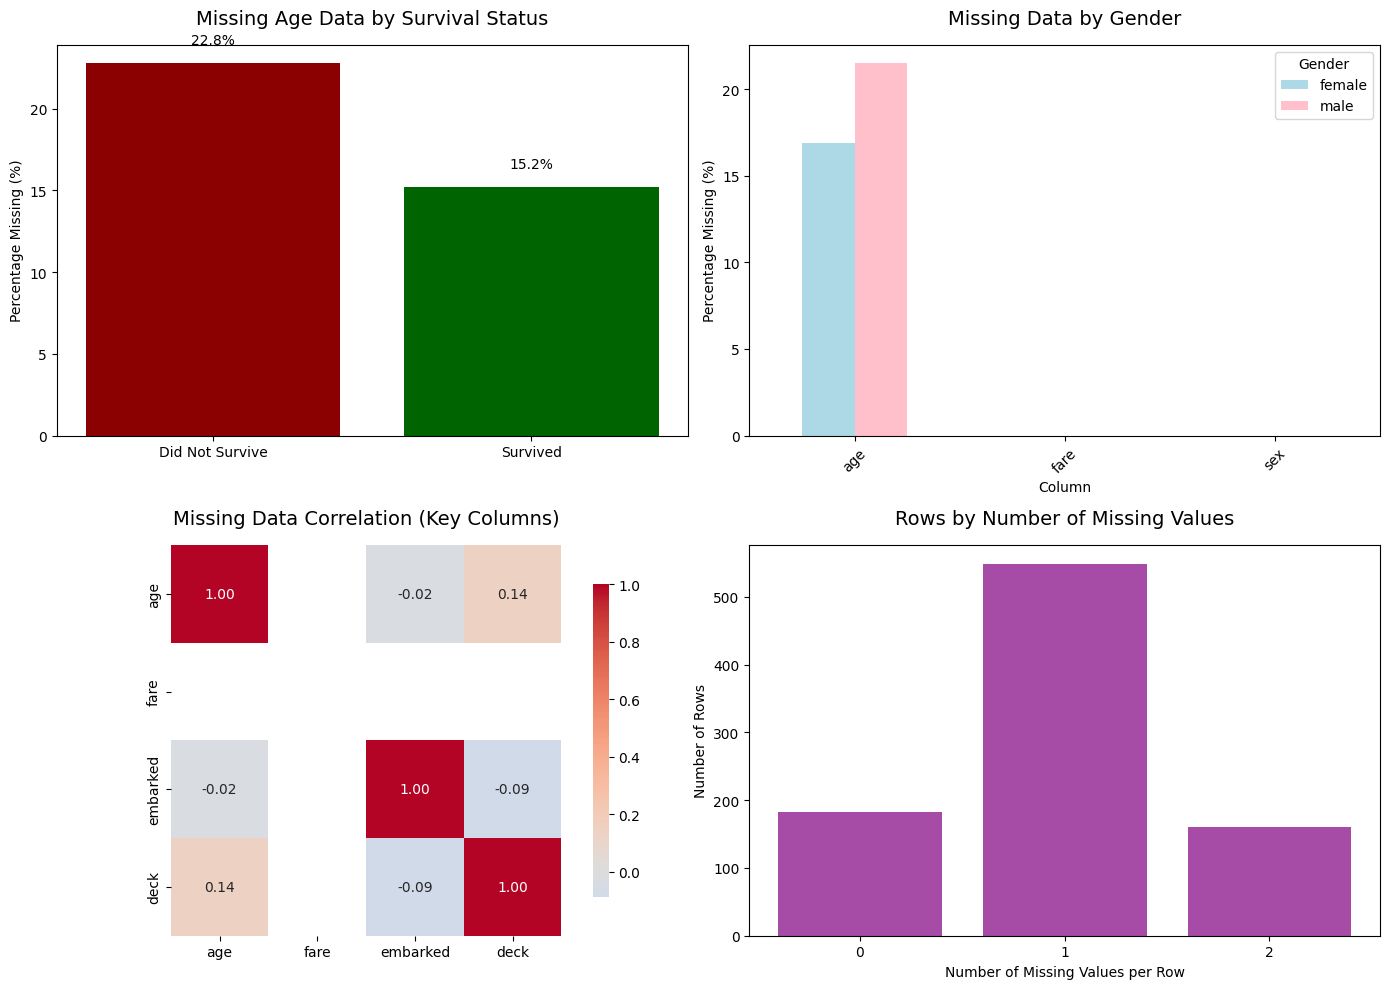

In [11]:
# Analyze missing data patterns across different groups
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Missing age by survival status
if 'survived' in titanic.columns and 'age' in titanic.columns:
    age_missing_by_survival = titanic.groupby('survived')['age'].apply(lambda x: x.isnull().mean() * 100)
    survival_labels = {0: 'Did Not Survive', 1: 'Survived'}
    x_labels = [survival_labels.get(s, f'Group {s}') for s in age_missing_by_survival.index]
    
    bars = axes[0, 0].bar(x_labels, age_missing_by_survival.values, color=['darkred', 'darkgreen'])
    axes[0, 0].set_title('Missing Age Data by Survival Status', fontsize=14, pad=15)
    axes[0, 0].set_ylabel('Percentage Missing (%)')
    
    for bar in bars:
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, height + 1,
                       f'{height:.1f}%', ha='center', va='bottom')

# 2. Missing data by gender
if 'sex' in titanic.columns:
    gender_groups = ['sex', 'age', 'fare']
    gender_data = []
    for col in gender_groups:
        if col in titanic.columns:
            for gender in titanic['sex'].unique():
                if pd.notna(gender):
                    missing_pct = titanic[titanic['sex'] == gender][col].isnull().mean() * 100
                    gender_data.append({'Column': col, 'Gender': gender, 'Missing %': missing_pct})
    
    if gender_data:
        gender_df = pd.DataFrame(gender_data)
        gender_pivot = gender_df.pivot(index='Column', columns='Gender', values='Missing %')
        gender_pivot.plot(kind='bar', ax=axes[0, 1], color=['lightblue', 'pink'])
        axes[0, 1].set_title('Missing Data by Gender', fontsize=14, pad=15)
        axes[0, 1].set_ylabel('Percentage Missing (%)')
        axes[0, 1].legend(title='Gender')
        axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Missing data pattern correlation (simplified)
missing_corr_simple = titanic[['age', 'fare', 'embarked', 'deck']].isnull().corr() if all(col in titanic.columns for col in ['age', 'fare', 'embarked', 'deck']) else pd.DataFrame()
if not missing_corr_simple.empty:
    sns.heatmap(missing_corr_simple, 
                annot=True, 
                fmt='.2f', 
                cmap='coolwarm', 
                center=0,
                square=True,
                cbar_kws={'shrink': 0.8},
                ax=axes[1, 0])
    axes[1, 0].set_title('Missing Data Correlation (Key Columns)', fontsize=14, pad=15)

# 4. Cumulative missing data
cumulative_missing = titanic.isnull().sum(axis=1).value_counts().sort_index()
axes[1, 1].bar(cumulative_missing.index, cumulative_missing.values, color='purple', alpha=0.7)
axes[1, 1].set_title('Rows by Number of Missing Values', fontsize=14, pad=15)
axes[1, 1].set_xlabel('Number of Missing Values per Row')
axes[1, 1].set_ylabel('Number of Rows')
axes[1, 1].set_xticks(range(int(cumulative_missing.index.max()) + 1))

plt.tight_layout()
plt.show()

## Quick Summary Visualization (All in One)

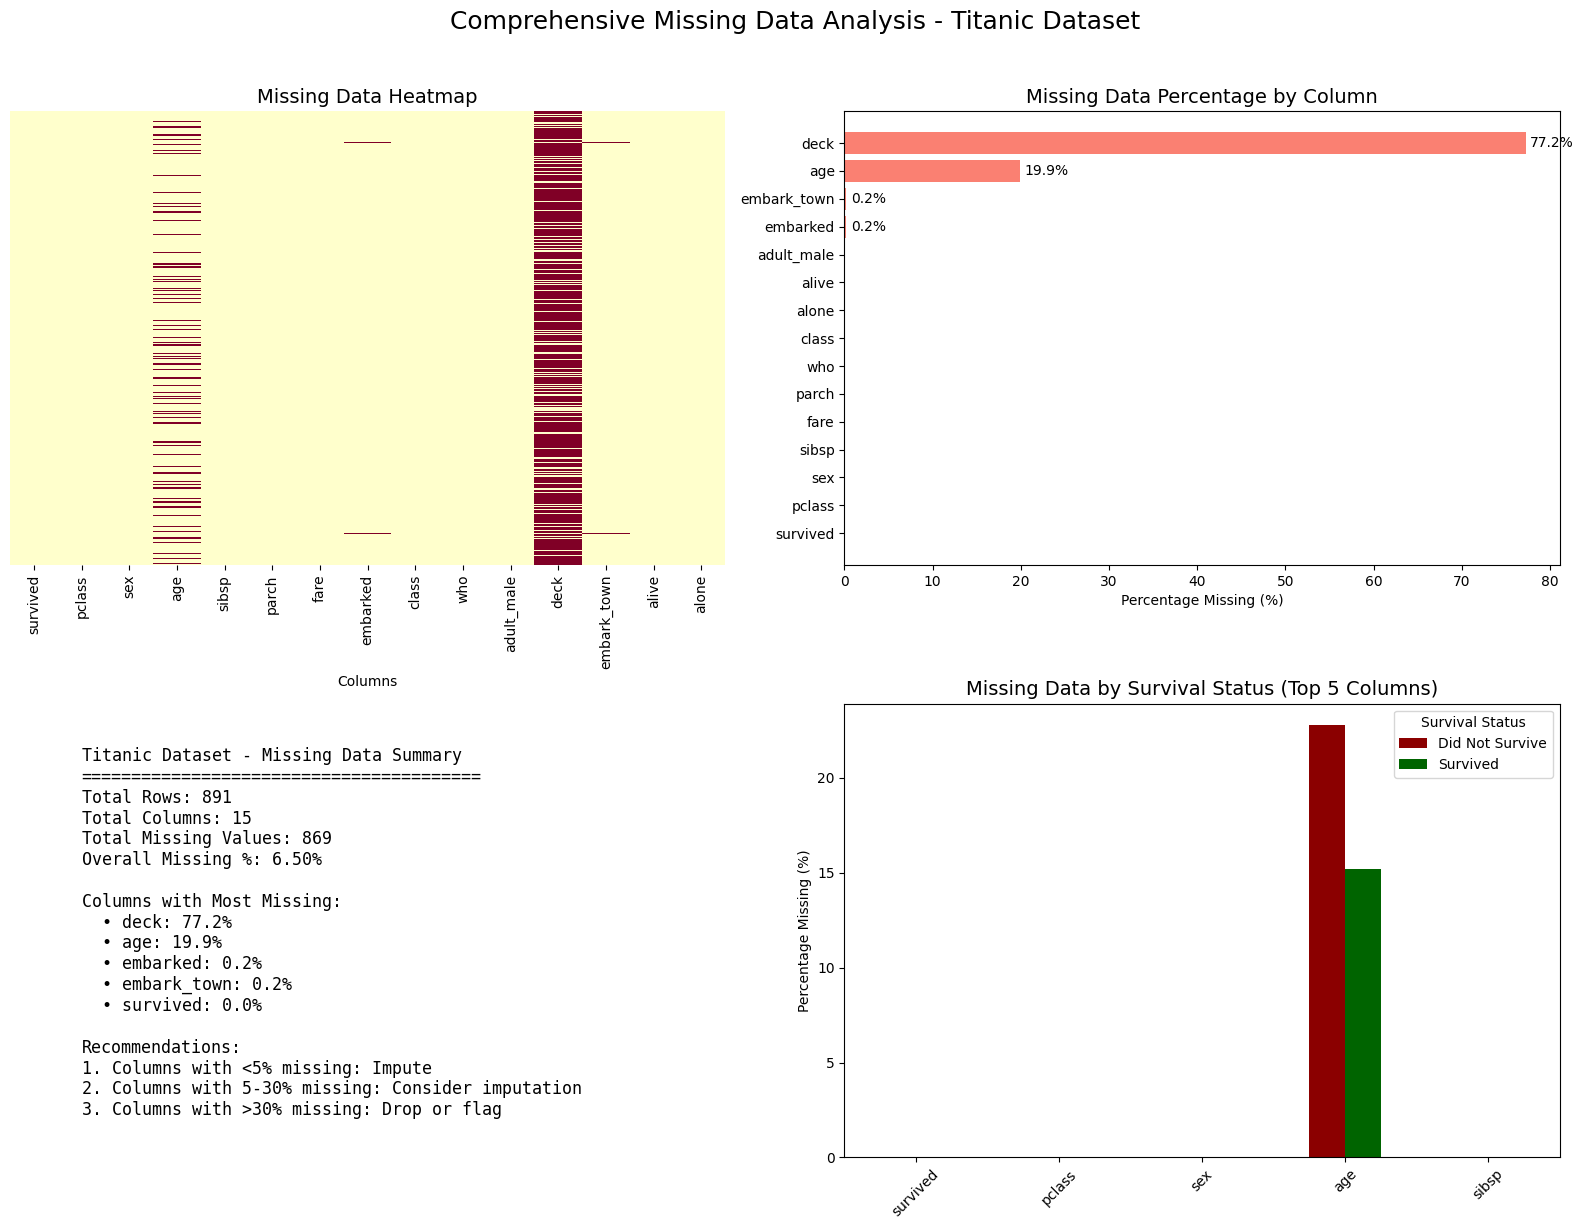

In [12]:
# Quick all-in-one visualization
fig = plt.figure(figsize=(16, 12))

# 1. Heatmap
ax1 = plt.subplot(2, 2, 1)
sns.heatmap(titanic.isnull(), cbar=False, cmap='YlOrRd', yticklabels=False, ax=ax1)
ax1.set_title('Missing Data Heatmap', fontsize=14)
ax1.set_xlabel('Columns')

# 2. Bar chart
ax2 = plt.subplot(2, 2, 2)
missing_percentages = (titanic.isnull().sum() / len(titanic) * 100).sort_values(ascending=True)
bars = ax2.barh(range(len(missing_percentages)), missing_percentages.values, color='salmon')
ax2.set_yticks(range(len(missing_percentages)))
ax2.set_yticklabels(missing_percentages.index)
ax2.set_title('Missing Data Percentage by Column', fontsize=14)
ax2.set_xlabel('Percentage Missing (%)')

# Add value labels
for i, (bar, value) in enumerate(zip(bars, missing_percentages.values)):
    if value > 0:
        ax2.text(value + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{value:.1f}%', va='center')

# 3. Statistics
ax3 = plt.subplot(2, 2, 3)
ax3.axis('off')
stats_text = f"""
Titanic Dataset - Missing Data Summary
{'='*40}
Total Rows: {len(titanic):,}
Total Columns: {len(titanic.columns)}
Total Missing Values: {titanic.isnull().sum().sum():,}
Overall Missing %: {(titanic.isnull().sum().sum() / (len(titanic) * len(titanic.columns)) * 100):.2f}%

Columns with Most Missing:
"""
# Get top 5 columns with most missing
top_missing = missing_percentages.nlargest(5)
for col, pct in top_missing.items():
    stats_text += f"  • {col}: {pct:.1f}%\n"

stats_text += f"""
Recommendations:
1. Columns with <5% missing: Impute
2. Columns with 5-30% missing: Consider imputation
3. Columns with >30% missing: Drop or flag
"""

ax3.text(0.1, 0.95, stats_text, transform=ax3.transAxes, 
        fontsize=12, verticalalignment='top', family='monospace')

# 4. Pattern by survival (if columns exist)
ax4 = plt.subplot(2, 2, 4)
if 'survived' in titanic.columns and 'age' in titanic.columns:
    survival_groups = titanic.groupby('survived')
    missing_by_survival = pd.DataFrame({
        'Did Not Survive': survival_groups.get_group(0).isnull().mean() * 100,
        'Survived': survival_groups.get_group(1).isnull().mean() * 100
    }).head(5)  # Top 5 columns
    
    missing_by_survival.plot(kind='bar', ax=ax4, color=['darkred', 'darkgreen'])
    ax4.set_title('Missing Data by Survival Status (Top 5 Columns)', fontsize=14)
    ax4.set_ylabel('Percentage Missing (%)')
    ax4.tick_params(axis='x', rotation=45)
    ax4.legend(title='Survival Status')
else:
    ax4.text(0.5, 0.5, 'Survival data not available\nfor comparison', 
            ha='center', va='center', fontsize=12)
    ax4.set_title('Cannot Compare by Survival', fontsize=14)

plt.suptitle('Comprehensive Missing Data Analysis - Titanic Dataset', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()